In [9]:
import os

import sys
import time

import init_load_board as ib 
import init_simple_mdp as imdp

import function_board as fb 
import function_tool as ft

import pandas as pd

import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=300)
np.set_printoptions(threshold=300)

import torch
torch.set_printoptions(precision=4)
torch.set_printoptions(linewidth=300)
torch.set_printoptions(threshold=300)

import helpers as h 

#%%
data_parameter_dir = fb.data_parameter_dir
result_dir = './result'  

#os.chdir('darts-thesis')

import simulator 

import math



In [2]:
# # Initialize Player Parameters 
# player_num = 10
# epsilon = 1
# name_pa = 'player{}'.format(player_num)

# # Extract Transition Probabilities 
# [aiming_grid, prob_grid_normalscore_nt, prob_grid_singlescore_nt, prob_grid_doublescore_nt, prob_grid_triplescore_nt, prob_grid_bullscore_nt] = h.load_aiming_grid(name_pa, epsilon=epsilon, data_parameter_dir=fb.data_parameter_dir, grid_version='custom_no_tokens')
# [aiming_grid, prob_grid_normalscore_t, prob_grid_singlescore_t, prob_grid_doublescore_t, prob_grid_triplescore_t, prob_grid_bullscore_t] = h.load_aiming_grid('t', data_parameter_dir=fb.data_parameter_dir, grid_version='custom_tokens')

# transition_probs = np.zeros((len(aiming_grid),63))

# for action in range(imdp.throw_num): 

#     transition_probs[action][0] = prob_grid_normalscore_nt[action][0]
#     transition_probs[action][1:21] = prob_grid_singlescore_nt[action][:]
#     transition_probs[action][21:41] = prob_grid_doublescore_nt[action][:]
#     transition_probs[action][41:61] = prob_grid_triplescore_nt[action][:]
#     transition_probs[action][61:63] = prob_grid_bullscore_nt[action][:]

# for action in range(imdp.throw_num,len(aiming_grid)): 

#     transition_probs[action][0] = prob_grid_normalscore_t[action][0]
#     transition_probs[action][1:21] = prob_grid_singlescore_t[action][:]
#     transition_probs[action][21:41] = prob_grid_doublescore_t[action][:]
#     transition_probs[action][41:61] = prob_grid_triplescore_t[action][:]
#     transition_probs[action][61:63] = prob_grid_bullscore_t[action][:]

# result_list = []
# result_list.append('miss')

# for i in range(1,21):
#     result_list.append('S{}'.format(i))

# for i in range(1,21):
#     result_list.append('D{}'.format(i))

# for i in range(1,21):
#     result_list.append('T{}'.format(i))

# result_list.append('SB')
# result_list.append('DB')

# tokens=0
# result_dic = h.solve_dp_turn_tokens(tokens, aiming_grid, prob_grid_normalscore_nt, prob_grid_singlescore_nt, prob_grid_doublescore_nt, prob_grid_triplescore_nt, prob_grid_bullscore_nt,prob_grid_normalscore_t, prob_grid_singlescore_t, prob_grid_doublescore_t, prob_grid_triplescore_t, prob_grid_bullscore_t)
# optimal_action_index = result_dic['optimal_action_index_dic']


In [4]:
sim = simulator.Simulator()
#sim.simulate_game(starting_score=501, starting_credits=0, spot_darts=None, spot_points=None)

load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: overflow encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: overflow encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:1163: RuntimeWarning: divide by zero encountered in divide
  num_turns_array[:,score_gained_index] = num_turns_array[:,score_gained_index] / prob_notbust_dic_nt[score_max]
/Users/rachael/Desktop/darts-thesis/helpers.py:1163: RuntimeWarning: overflow encountered in divide
  num_turns_array[:,score_gained_index] = num_turns_array[:,score_gained_index] / prob_no

solve dp_turn_policyiter in 25.939202070236206 seconds
[[0.     0.     1.8856 ... 5.5944 5.5758 5.6116]
 [0.     0.     1.     ... 4.9685 4.9631 4.9765]
 [0.     0.     1.     ... 4.7444 4.7403 4.7516]
 ...
 [0.     0.     1.     ... 3.8072 3.8026 3.783 ]
 [0.     0.     1.     ... 3.5561 3.5447 3.4989]
 [0.     0.     1.     ... 3.     3.     3.    ]]


In [5]:
# Build Dataset 

def build_dataset(simulation_paths,player_num,epsilon,tokens,spot_points,spot_darts):
    data_list = []
    data_cols = ['player','epsilon','tokens','spot_points','spot_darts','game_id','throw_number','state','state_score','state_tokens']

    for game in range(len(simulation_paths)):

        for throw in range(len(simulation_paths[game])):

            data_list.append([player_num,epsilon,tokens,spot_points,spot_darts,game,throw,simulation_paths[game][throw],simulation_paths[game][throw][0],simulation_paths[game][throw][1]])

    df = pd.DataFrame(data_list,columns=data_cols)

    return df 

In [7]:
# Initialize Parameters 

iterations = 100
player_num = 10
tokens = 0
epsilon_list = [1,2,3,4,5,6,7,8]
starting_score = 501
spot_points=None
spot_darts=None

sim_list = []

col_names = ['player','epsilon','tokens','spot_points','spot_darts','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for epsilon in epsilon_list:
    
    sim_list.append(simulator.Simulator(player_num=player_num,epsilon=epsilon))
    i = epsilon_list.index(epsilon)
    simulation_paths = sim_list[i].run_simulation(iterations, starting_score=starting_score, starting_credits=tokens, spot_darts=spot_darts, spot_points=spot_points)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,tokens,spot_points,spot_darts)])
    df = df.reset_index().drop(['index'],axis=1)

load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: overflow encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: overflow encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:1163: RuntimeWarning: divide by zero encountered in divide
  num_turns_array[:,score_gained_index] = num_turns_array[:,score_gained_index] / prob_notbust_dic_nt[score_max]
/Users/rachael/Desktop/darts-thesis/helpers.py:1163: RuntimeWarning: overflow encountered in divide
  num_turns_array[:,score_gained_index] = num_turns_array[:,score_gained_index] / prob_no

solve dp_turn_policyiter in 25.176536083221436 seconds
[[0.     0.     1.8856 ... 5.5944 5.5758 5.6116]
 [0.     0.     1.     ... 4.9685 4.9631 4.9765]
 [0.     0.     1.     ... 4.7444 4.7403 4.7516]
 ...
 [0.     0.     1.     ... 3.8072 3.8026 3.783 ]
 [0.     0.     1.     ... 3.5561 3.5447 3.4989]
 [0.     0.     1.     ... 3.     3.     3.    ]]
Ran in 0.049s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:1156: RuntimeWarning: divide by zero encountered in divide
  num_turns_array[imdp.throw_num:,score_gained_index] = num_turns_array[imdp.throw_num:,score_gained_index] / prob_notbust_dic_t[score_max][imdp.throw_num:]
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: divide by zero encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: invalid value encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()


solve dp_turn_policyiter in 27.915621995925903 seconds
[[0.     0.     2.5371 ... 7.405  7.4122 7.4278]
 [0.     0.     1.     ... 6.267  6.2766 6.2897]
 [0.     0.     1.     ... 5.8664 5.8755 5.8889]
 ...
 [0.     0.     1.     ... 3.9977 3.9967 4.0008]
 [0.     0.     1.     ... 3.7246 3.6864 3.6893]
 [0.     0.     1.     ... 3.     3.     3.    ]]
Ran in 0.065s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:1156: RuntimeWarning: divide by zero encountered in divide
  num_turns_array[imdp.throw_num:,score_gained_index] = num_turns_array[imdp.throw_num:,score_gained_index] / prob_notbust_dic_t[score_max][imdp.throw_num:]
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: divide by zero encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: invalid value encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()


solve dp_turn_policyiter in 33.1960551738739 seconds
[[0.     0.     3.0946 ... 8.938  8.9526 8.9673]
 [0.     0.     1.     ... 7.312  7.3264 7.341 ]
 [0.     0.     1.     ... 6.7576 6.772  6.7866]
 ...
 [0.     0.     1.     ... 4.1559 4.1634 4.1696]
 [0.     0.     1.     ... 3.7995 3.7591 3.7597]
 [0.     0.     1.     ... 3.     3.     3.    ]]
Ran in 0.076s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e4_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:1156: RuntimeWarning: divide by zero encountered in divide
  num_turns_array[imdp.throw_num:,score_gained_index] = num_turns_array[imdp.throw_num:,score_gained_index] / prob_notbust_dic_t[score_max][imdp.throw_num:]
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: divide by zero encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: invalid value encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()


solve dp_turn_policyiter in 27.75742793083191 seconds
[[ 0.      0.      3.6299 ... 10.1945 10.2106 10.227 ]
 [ 0.      0.      1.     ...  8.0904  8.1063  8.1227]
 [ 0.      0.      1.     ...  7.4217  7.4375  7.4541]
 ...
 [ 0.      0.      1.     ...  4.2948  4.3033  4.3148]
 [ 0.      0.      1.     ...  3.8377  3.799   3.8056]
 [ 0.      0.      1.     ...  3.      3.      3.    ]]
Ran in 0.088s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e5_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:1156: RuntimeWarning: divide by zero encountered in divide
  num_turns_array[imdp.throw_num:,score_gained_index] = num_turns_array[imdp.throw_num:,score_gained_index] / prob_notbust_dic_t[score_max][imdp.throw_num:]
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: divide by zero encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: invalid value encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()


solve dp_turn_policyiter in 27.59005379676819 seconds
[[ 0.      0.      4.1579 ... 11.2985 11.3159 11.3335]
 [ 0.      0.      1.     ...  8.7131  8.7305  8.7481]
 [ 0.      0.      1.     ...  7.9508  7.9681  7.9858]
 ...
 [ 0.      0.      1.     ...  4.4062  4.4171  4.4302]
 [ 0.      0.      1.     ...  3.8621  3.8266  3.8402]
 [ 0.      0.      1.     ...  3.      3.      3.    ]]
Ran in 0.100s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e6_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:1156: RuntimeWarning: divide by zero encountered in divide
  num_turns_array[imdp.throw_num:,score_gained_index] = num_turns_array[imdp.throw_num:,score_gained_index] / prob_notbust_dic_t[score_max][imdp.throw_num:]
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: divide by zero encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: invalid value encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()


solve dp_turn_policyiter in 28.478217840194702 seconds
[[ 0.      0.      4.6828 ... 12.2911 12.3097 12.3283]
 [ 0.      0.      1.     ...  9.2167  9.2353  9.2539]
 [ 0.      0.      1.     ...  8.3775  8.396   8.4146]
 ...
 [ 0.      0.      1.     ...  4.4991  4.5107  4.5277]
 [ 0.      0.      1.     ...  3.8821  3.8475  3.8685]
 [ 0.      0.      1.     ...  3.      3.      3.    ]]
Ran in 0.105s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e7_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:1156: RuntimeWarning: divide by zero encountered in divide
  num_turns_array[imdp.throw_num:,score_gained_index] = num_turns_array[imdp.throw_num:,score_gained_index] / prob_notbust_dic_t[score_max][imdp.throw_num:]
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: divide by zero encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: invalid value encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()


solve dp_turn_policyiter in 27.745243072509766 seconds
[[ 0.      0.      5.2061 ... 13.1942 13.2137 13.2331]
 [ 0.      0.      1.     ...  9.627   9.6465  9.666 ]
 [ 0.      0.      1.     ...  8.7243  8.7437  8.7632]
 ...
 [ 0.      0.      1.     ...  4.5744  4.5875  4.6058]
 [ 0.      0.      1.     ...  3.9     3.8645  3.8941]
 [ 0.      0.      1.     ...  3.      3.      3.    ]]
Ran in 0.133s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e8_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:1156: RuntimeWarning: divide by zero encountered in divide
  num_turns_array[imdp.throw_num:,score_gained_index] = num_turns_array[imdp.throw_num:,score_gained_index] / prob_notbust_dic_t[score_max][imdp.throw_num:]
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: divide by zero encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()
/Users/rachael/Desktop/darts-thesis/helpers.py:1183: RuntimeWarning: invalid value encountered in divide
  value_relerror[rt] = np.abs((state_value_update[rt] - state_value[rt])/state_value_update[rt]).max()


solve dp_turn_policyiter in 32.46235108375549 seconds
[[ 0.      0.      5.7282 ... 14.0264 14.0466 14.0667]
 [ 0.      0.      1.     ...  9.9656  9.9858 10.006 ]
 [ 0.      0.      1.     ...  9.0095  9.0297  9.0499]
 ...
 [ 0.      0.      1.     ...  4.6377  4.6512  4.6709]
 [ 0.      0.      1.     ...  3.909   3.8791  3.9178]
 [ 0.      0.      1.     ...  3.      3.      3.    ]]
Ran in 0.130s.


In [38]:
# Initialize Parameters 

iterations = 10000
player_num = 10
tokens1 = 0
tokens0 = 0
epsilon_list = [1,2,3,4,5,6,7,8]
starting_score = 501
spot_points1=0
spot_points0=0
spot_darts1=0
spot_darts0=0

outcomes = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            i1 = epsilon_list.index(epsilon1)
            sim1 = sim_list[i1]
            sim1_paths = sim1.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens1, spot_darts=spot_darts1, spot_points=spot_points1)
            
            i0 = epsilon_list.index(epsilon0)
            sim0 = sim_list[i0]
            sim0_paths = sim0.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens0, spot_darts=spot_darts0, spot_points=spot_points0)
        
            starter = 0 

            for iter in range(iterations):

                # get the number of turns needed to win 
                turns1 = math.ceil((len(sim1_paths[iter]) - 1) / 3)
                turns0 = math.ceil((len(sim0_paths[iter]) - 1) / 3)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes.append([player_num,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



Ran in 4.529s.
Ran in 4.499s.
Ran in 4.658s.
Ran in 6.249s.
Ran in 4.489s.
Ran in 7.369s.
Ran in 4.950s.
Ran in 8.683s.
Ran in 4.587s.
Ran in 9.097s.
Ran in 4.490s.
Ran in 9.970s.
Ran in 4.540s.
Ran in 10.468s.
Ran in 4.452s.
Ran in 11.008s.
Ran in 5.877s.
Ran in 5.878s.
Ran in 5.894s.
Ran in 7.165s.
Ran in 5.936s.
Ran in 8.167s.
Ran in 5.908s.
Ran in 8.970s.
Ran in 6.028s.
Ran in 9.949s.
Ran in 6.034s.
Ran in 10.439s.
Ran in 5.953s.
Ran in 11.029s.
Ran in 7.166s.
Ran in 7.316s.
Ran in 7.294s.
Ran in 8.271s.
Ran in 7.332s.
Ran in 8.961s.
Ran in 7.175s.
Ran in 9.590s.
Ran in 7.257s.
Ran in 10.582s.
Ran in 7.485s.
Ran in 11.251s.
Ran in 8.381s.
Ran in 8.294s.
Ran in 8.272s.
Ran in 9.130s.
Ran in 8.092s.
Ran in 9.699s.
Ran in 8.179s.
Ran in 10.346s.
Ran in 8.107s.
Ran in 10.916s.
Ran in 8.959s.
Ran in 8.976s.
Ran in 8.973s.
Ran in 9.655s.
Ran in 9.049s.
Ran in 10.377s.
Ran in 8.977s.
Ran in 10.897s.
Ran in 9.694s.
Ran in 9.673s.
Ran in 9.657s.
Ran in 10.344s.
Ran in 9.830s.
Ran in 10.963s

In [39]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df = pd.DataFrame(data=outcomes,columns=col_names)

In [49]:
df_baseline_results = df.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
#df_baseline_results
df_baseline_results = df_baseline_results.round(2)

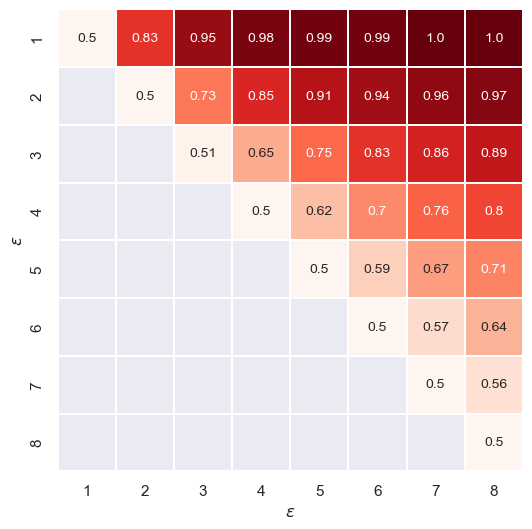

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

df_baseline_results_graph = df_baseline_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_baseline_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

In [55]:
beta = 3.3
lower_beta =  math.floor(beta)
higher_beta = math.ceil(beta)

gap = beta - math.floor(lower_beta)
print(gap)
iterations = 10000

games_with_higher = gap * iterations 
np.round(games_with_higher)



0.2999999999999998


3000.0

In [ ]:
'''

(1) Baseline 
- % of games for different epsilons 

(2) Baseline handicaps (spot point)
- % of games won with different other handicaps 

(3) Optimal handicap with beta 
- explore different rounding methods (floor vs. equalized expectatino) for credit 

(4) Optimal spot point
- round and compare to optimal beta

'''

In [46]:
simulation_paths[1]

[(501, 0, 3, 0),
 (501, 0, 2, 7),
 (501, 0, 1, 64),
 (418, 0, 3, 0),
 (418, 0, 2, 19),
 (418, 0, 1, 22),
 (393, 0, 3, 0),
 (393, 0, 2, 19),
 (393, 0, 1, 38),
 (298, 0, 3, 0),
 (298, 0, 2, 3),
 (298, 0, 1, 60),
 (219, 0, 3, 0),
 (219, 0, 2, 3),
 (219, 0, 1, 22),
 (194, 0, 3, 0),
 (194, 0, 2, 3),
 (194, 0, 1, 22),
 (153, 0, 3, 0),
 (153, 0, 2, 7),
 (153, 0, 1, 14),
 (82, 0, 3, 0),
 (82, 0, 2, 16),
 (82, 0, 1, 31),
 (32, 0, 3, 0),
 (32, 0, 2, 0),
 (32, 0, 1, 16),
 (16, 0, 3, 0),
 (16, 0, 2, 0),
 (16, 0, 1, 8),
 (16, 0, 3, 0),
 (16, 0, 2, 0),
 (16, 0, 1, 0),
 (8, 0, 3, 0),
 (8, 0, 2, 4),
 (8, 0, 3, 0),
 (8, 0, 2, 4),
 (8, 0, 1, 4),
 (2, 0, 3, 0),
 (2, 0, 3, 0),
 (2, 0, 3, 0),
 (2, 0, 3, 0),
 (2, 0, 3, 0),
 (2, 0, 3, 0),
 (2, 0, 2, 0),
 (2, 0, 3, 0),
 (2, 0, 2, 0),
 (2, 0, 3, 0),
 (0, 0, 0, 0)]